In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
'''[0,1] rescaling (max(X))!=0'''
def Norm01(x):
    mi=np.nanmin(x)
    ma=np.nanmax(np.array(x)-mi)
    if ma>0.:
        x_n=(np.array(x)-mi)/ma
        return x_n, mi, ma
    else:
        return np.zeros(len(x)), mi, ma

In [3]:
df=pd.read_csv('artdata_350.csv')
#df=pd.read_csv('real_data.csv')
scores=pd.read_csv('res_artdata_sMAPE.csv')
#scores=pd.read_csv('res_artdata_sMAPE.csv')
df

,t,000,001,002,003,004,005,006,007,008,...,340,341,342,343,344,345,346,347,348,349
0,0,0.000000e+00,0.000507,0.000000,0.004227,0.006770,0.007998,0.008509,0.000000,0.002511,...,0.941926,0.216431,0.100857,0.720956,0.805360,0.407971,0.722151,0.907015,0.000000,0.197461
1,1,2.001058e-01,0.200374,0.200302,0.203267,0.204702,0.205934,0.207602,0.197768,0.200784,...,0.959256,0.231922,0.151703,0.666104,0.773773,0.404965,0.730443,0.918069,0.065819,0.214396
2,2,3.921171e-01,0.392275,0.392272,0.394253,0.394995,0.396566,0.396887,0.387311,0.390655,...,0.931831,0.218798,0.106201,0.660158,0.829433,0.396441,0.753046,0.906512,0.102420,0.229370
3,3,5.682668e-01,0.568226,0.568012,0.569966,0.569702,0.571145,0.570474,0.562160,0.564462,...,0.926929,0.212540,0.159184,0.697222,0.890114,0.426487,0.731631,0.900721,0.146398,0.181756
4,4,7.214296e-01,0.721173,0.721259,0.722947,0.721703,0.723402,0.722709,0.715255,0.716628,...,0.879745,0.170561,0.132028,0.655550,0.865425,0.424298,0.701979,0.900194,0.190180,0.147541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,7.214296e-01,0.720831,0.721086,0.718762,0.714011,0.714345,0.716406,0.716282,0.715813,...,0.597098,0.870991,0.048345,0.776607,0.746881,0.907109,0.126962,0.293390,0.804687,0.892533
496,496,5.682668e-01,0.567984,0.567830,0.565926,0.562332,0.562817,0.563800,0.565561,0.564026,...,0.643921,0.887028,0.000000,0.726370,0.779959,0.919790,0.135488,0.214305,0.833606,0.855646
497,497,3.921171e-01,0.391919,0.392102,0.390928,0.388154,0.388224,0.388025,0.391441,0.390750,...,0.587693,0.857205,0.046477,0.714183,0.774538,0.933921,0.148795,0.274114,0.883988,0.849542
498,498,2.001058e-01,0.200024,0.200135,0.199537,0.198282,0.198240,0.197598,0.201672,0.199991,...,0.598738,0.815740,0.023880,0.688073,0.781139,0.952391,0.139919,0.248862,0.862255,0.879616


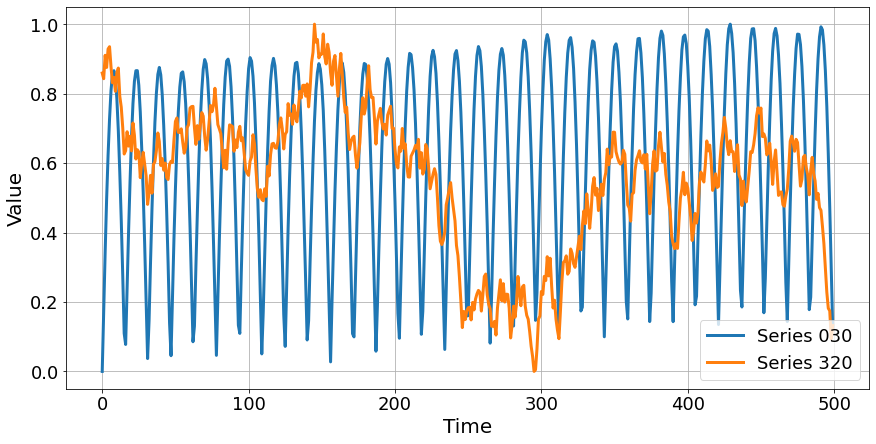

In [4]:
plt.figure(figsize=(12,6))
plt.plot(Norm01(df['050'])[0], lw=3, label='Series 030')#Energy consumption
plt.plot(Norm01(df['320'])[0], lw=3, label='Series 320')#Stock market price
#plt.plot(df['320'], lw=2, label='Series 320')
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Value', size=20)
plt.xlabel('Time', size=20)
plt.grid(axis='both')
plt.legend(fontsize=18)
plt.tight_layout(pad=.1)
#plt.savefig('data_art.png', dpi=200, format='png' )
plt.show()

C:\Users\user\WPy64-3720\python-3.7.2.amd64\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in long_scalars
  import sys


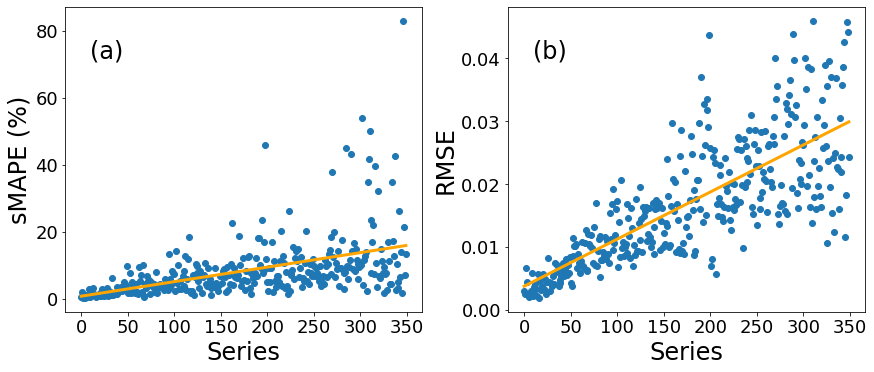

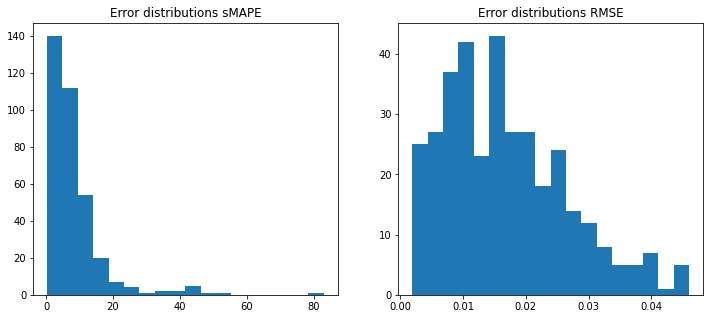

In [5]:
'''Least squares'''
def MLS(x,y): 
    n=len(x)
    sumx, sumy=sum(x), sum(y)
    sumx2=sum([t*t for t in x])
    sumxy=sum([t*u for t,u in zip(x,y)])
    a = (n * sumxy - (sumx * sumy)) / (n * sumx2 - sumx * sumx);
    b = (sumy - a * sumx) / n;
    return a, b
sc=pd.read_csv('res_artdata_RMSE.csv')
t=np.arange(len(scores.columns)-1)
plt.figure(figsize=(12,5))
plt.xticks(size=16)
for i in range(1):
    s=sc.iloc[i, 1:].values
    s1=scores.iloc[i, 1:].values
    a,b=MLS(t,s)
    a1,b1=MLS(t,s1)
    plt.subplot(1,2,2)   
    #plt.plot(s, marker='o',label='MSE', alpha=.7)
    plt.scatter(np.arange(len(s)), s, marker='o',label='RMSE')
    plt.plot(a*t+b, lw=3, c='orange')
    plt.text(10, .04, '(b)',size=24)
    plt.xticks(size=18)
    plt.yticks(size=18)
    plt.ylabel('RMSE',size=24)
    plt.xlabel('Series',size=24)
    plt.subplot(1,2,1)
    #plt.plot(s1, marker='o',label='sMAPE', alpha=.7)
    plt.scatter(np.arange(len(s1)), s1, marker='o',label='sMAPE')
    plt.plot(a1*t+b1, lw=3, c='orange')
    plt.text(10, 72, '(a)',size=24)
    plt.xticks(size=18)
    plt.yticks(size=18)
    plt.ylabel('sMAPE (%)',size=24)
    plt.xlabel('Series',size=24)
plt.tight_layout(pad=0.1, w_pad=.7)
#plt.savefig('std_smape.png', dpi=300, format='png' )
plt.show()
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(s1, bins=18)
plt.title('Error distributions sMAPE')
plt.subplot(1,2,2)
plt.hist(s, bins=18)
plt.title('Error distributions RMSE')
plt.show()

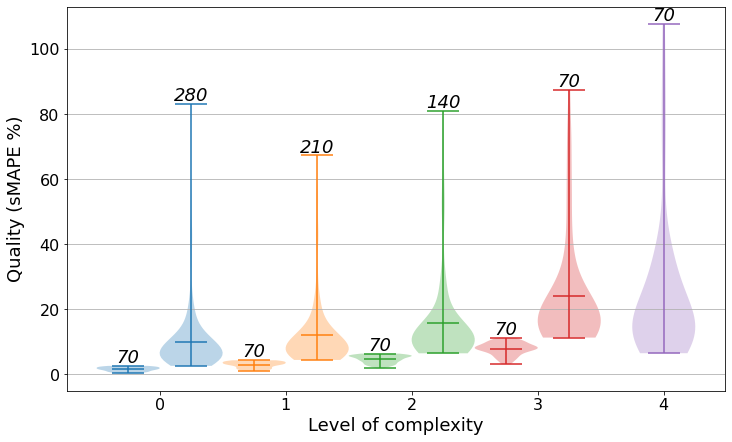

In [6]:
'''Quantity Strategy'''
labels=pd.DataFrame(columns=['series', 'level'])
allser=scores.columns[1:]#.tolist()
labels.series=allser
a={}
for i in range(5):
    labels['score%i'%i]=scores.loc[i, allser].values
for i in range(5):
    a[i]=labels[labels['score%i'%i].rank(method='dense') <= (len(df.columns)-1)//5].series.values
    labels=labels.drop(labels[labels['score%i'%i].rank(method='dense') <=  (len(df.columns)-1)//5].index)
labels=pd.DataFrame(columns=['series', 'level'])
allser=scores.columns[1:]#.tolist()
labels.series=allser
for i in a.keys():
    labels.loc[labels.series.isin(a[i]), 'level']=i
for i in range(5):
    labels['score%i'%i]=scores.loc[i, allser].values

    
plt.figure(figsize=(10,6))
for i in range(4):
    col='score%i'%i
    l1=labels[labels.level==i][col].values
    l2=labels[labels.level>i][col].values
    plt.violinplot((l1,l2), positions=[i-.25, i+.25], showmeans=True)
    plt.text(i-.25, max(l1)+1, str(len(l1)), horizontalalignment='center', style='italic', size=18)
    plt.text(i+.25, max(l2)+1, str(len(l2)), horizontalalignment='center', style='italic', size=18)
plt.xticks(np.arange(5), np.arange(5), size=16)
plt.yticks(size=16)
plt.xlabel('Level of complexity', size=18)
plt.ylabel('Quality (sMAPE %)', size=18)
l2=labels[labels.level==4].score4
plt.violinplot(labels[labels.level==4].score4, positions=[4])
plt.text(4, max(l2)+1, str(len(l2)), horizontalalignment='center', style='italic', size=18)
plt.grid(axis='y')
plt.tight_layout(pad=0.1)
plt.savefig('real_equal.png', dpi=300, format='png' )
plt.show()

level 0 - quantile 2.604: 70 items
level 1 - quantile 3.990: 56 items
level 2 - quantile 4.983: 45 items
level 3 - quantile 6.428: 36 items
level 4 - quantile 7.080: 29 items


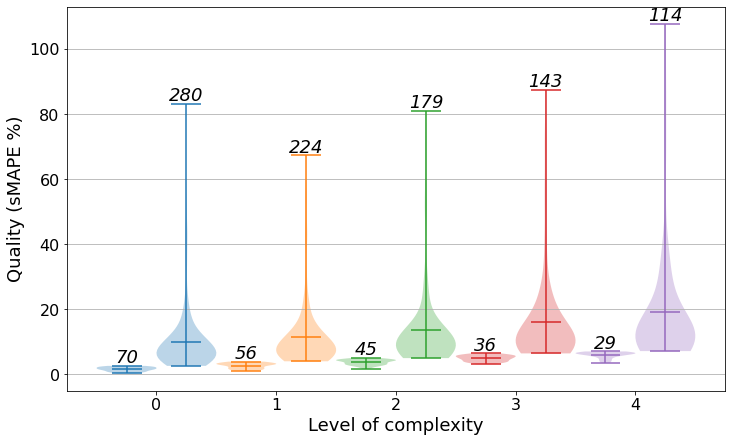

0

In [7]:
''' Sieve - quality labels'''
labels=pd.DataFrame(columns=['series', 'level'])
allser=scores.columns[1:]#.tolist()
labels.series=allser
quality=[10]*5#[5,5,5,5,5] #For level strategy
tile=.2 #For quantile strategy
for i in range(5):
    s=scores.loc[i, allser].values
    b=np.quantile(s, tile)  #For quantile strategy
    #b=quality[i]
    j=np.where(s<=b)[0]
    print('level %i - quantile %.3f: %i items'%(i, b, len(j)))
    labels.iloc[labels.index[labels.series.isin(allser[j]).tolist()], 1]=i
    allser=np.delete(allser,j)
labels=labels.fillna(value=4)
allser=scores.columns[1:]
for i in range(5):
    labels['score%i'%i]=scores.loc[i, allser].values
'''plot'''
plt.figure(figsize=(10,6))
lab=labels.copy()
for i in range(5):
    col='score%i'%i
    b=np.quantile(lab[col].values, tile) #For quantile strategy
    #b=quality[i]
    l1=lab[lab[col]<=b][col]  
    l2=lab[lab[col]>b][col]
    if len(l1)==0:
        l1=[10]
    else: lab=lab.drop(l1.index)
    if len(l2)==0:
        l2=[0]   
    plt.violinplot((l1, l2), positions=[i-.25, i+.25], showmeans=True)
    plt.text(i-.25, max(l1)+1, str(len(l1)), horizontalalignment='center', style='italic', size=18)
    plt.text(i+.25, max(l2)+1, str(len(l2)), horizontalalignment='center', style='italic', size=18)
#plt.axhline(10, ls='-.', c='orange', label='10% bound')
plt.xticks(np.arange(5), np.arange(5), size=16)
plt.yticks(size=16)
plt.xlabel('Level of complexity', size=18)
plt.ylabel('Quality (sMAPE %)', size=18)
#plt.violinplot(labels[labels.level==5].score4, positions=[5])
plt.grid(axis='y')
#plt.legend(fontsize=16, loc=2)
plt.tight_layout(pad=0.1)
#plt.savefig('RF_quant50.png', dpi=300, format='png' )
plt.show()
len(labels[labels.level==5])

0 0.27464065672936794
1 0.16035844959780798
2 0.12352187304591217
3 0.0830315304861559
4 0.0705187772868041


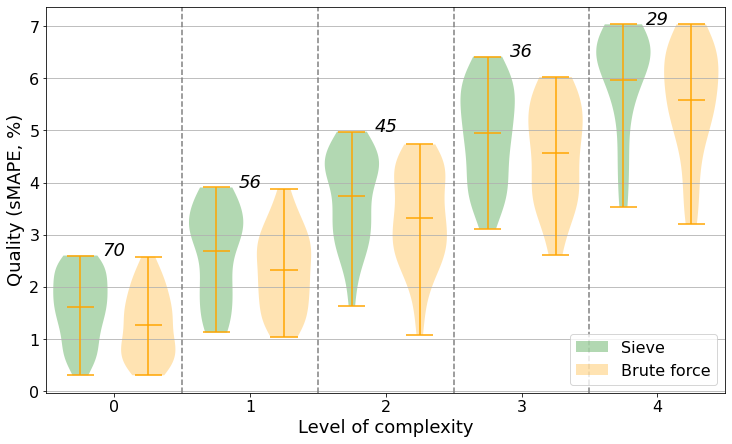

0.1424142574292096

In [10]:
plt.figure(figsize=(10,6))
lab=labels.copy()
qu=[]
for i in range(5):
    col='score%i'%i
    b=np.quantile(lab[col].values, tile)
    #b=quality[i]
    l1=lab[lab[col]<=b][col] 
    l2=lab[lab[col]>b][col]
    a=['score0','score1','score2','score3','score4']
    #a.remove(col)
    l3=lab[lab[col]<=b][a].values.min(axis=1)
    if len(l1)==0:
        l1=[10]
    else: lab=lab.drop(l1.index)
    if len(l2)==0:
        l2=[0]    
    v=plt.violinplot((l1, l3), positions=[i-.25, i+.25], showmeans=True, widths=0.4)
    v['bodies'][0].set_facecolor('green')
    v['bodies'][1].set_facecolor('orange')
    v['cmaxes'].set_color('orange')
    v['cbars'].set_color('orange')
    v['cmins'].set_color('orange')
    v['cmeans'].set_color('orange')
    print(i, (l1.mean()-l3.mean())/l3.mean())
    qu.append((l1.mean()-l3.mean())/l3.mean())
    plt.text(i, max(l1)+.0001, str(len(l1)), horizontalalignment='center', style='italic', size=18)
    #plt.text(i, (l1.mean()+l3.mean())/2, '%.4f'%(l1.mean()-l3.mean()), horizontalalignment='center', style='italic', color='orange', size=18)
#plt.axhline(10, ls='-.', c='orange', label='10% bound')
plt.xticks(np.arange(5), np.arange(5), size=16)
plt.yticks(size=16)
plt.xlabel('Level of complexity', size=18)
plt.ylabel('Quality (sMAPE, %)', size=18)
# plt.violinplot(l2, positions=[5])
# plt.text(5, max(l2)+.5, str(len(l2)), horizontalalignment='center', style='italic', size=18)
plt.grid(axis='y')
plt.legend(['Sieve', 'Brute force'], fontsize=16, loc=4)
for h in [.5,1.5,2.5,3.5]:
        plt.axvline(h, ls='--', c='gray')

plt.xlim(-0.5, 4.5)
plt.tight_layout(pad=0.1)
#plt.savefig('comp_qual_quant.png', dpi=300, format='png' )
plt.show()
len(labels[labels.level==5])
np.mean(qu)